<a href="https://colab.research.google.com/github/PujaRc/Demo_DL/blob/master/fashion_mnist_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install wandb -q

     |████████████████████████████████| 1.4MB 8.8MB/s 
     |████████████████████████████████| 460kB 29.3MB/s 
     |████████████████████████████████| 102kB 14.8MB/s 
     |████████████████████████████████| 102kB 15.5MB/s 
     |████████████████████████████████| 102kB 14.1MB/s 
     |████████████████████████████████| 71kB 13.4MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 


In [26]:
!wandb login 06b3ae8f0a24309addfef923c7c7332548078970

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [27]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

import wandb
from wandb.keras import WandbCallback

print(tf.__version__)

2.1.0


# Load the data

In [0]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.fashion_mnist.load_data()

In [0]:
train_images = train_images/255.0
test_images =  test_images/255.0

In [0]:
%matplotlib inline

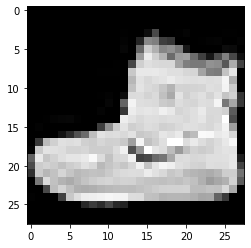

In [31]:
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [72]:
wandb.init(project="demo-project")
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(784,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer=keras.optimizers.Adamax(),loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [74]:
model.fit(train_images,train_labels,epochs=20,callbacks=[WandbCallback()])
# model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4631 - accuracy: 0.8349
Epoch 2/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3467 - accuracy: 0.8730
Epoch 3/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3091 - accuracy: 0.8862
Epoch 4/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2837 - accuracy: 0.8939
Epoch 5/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2658 - accuracy: 0.9011
Epoch 6/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2500 - accuracy: 0.9060
Epoch 7/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2334 - accuracy: 0.9136
Epoch 8/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2215 - accuracy: 0.9163
Epoch 9/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2104 - accuracy: 0.9204
Epoch 10/20
60

In [75]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3564 - accuracy: 0.9003


[0.3563854782834649, 0.9003]